# Step 4: Exploring Data
## 6.1 A First Glimpse at the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read .csv file for Market Segmentation
df = pd.read_csv('vacation.csv')

In [3]:
df.columns

Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt',
       'do sports', 'excitement, a challenge', 'not exceed planned budget',
       'realise creativity', 'fun and entertainment', 'good company',
       'health and beauty', 'free-and-easy-going', 'entertainment facilities',
       'not care about prices', 'life style of the local people',
       'intense experience of nature', 'cosiness/familiar atmosphere',
       'maintain unspoilt surroundings', 'everything organised',
       'unspoilt nature/natural landscape', 'cultural offers',
       'change of surroundings'],
      dtype='object')

In [4]:
sub_col = ['Gender','Age', 'Income', 'Income2']
sub_df = df[sub_col]

sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gender   1000 non-null   object
 1   Age      1000 non-null   int64 
 2   Income   934 non-null    object
 3   Income2  934 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Age,Education,Obligation,NEP,Vacation.Behaviour
count,1000.000000,992.000000,1000.000000,1000.000000,975.000000
mean,44.168000,4.813508,3.734767,3.648600,2.962800
std,14.539228,2.422252,0.635777,0.561135,0.668347
min,18.000000,1.000000,1.000000,1.733333,1.233333
25%,32.000000,3.000000,3.366667,3.266667,2.466667
50%,42.000000,6.000000,3.800000,3.666667,2.944444
75%,57.000000,7.000000,4.200000,4.066667,3.428571
max,105.000000,8.000000,5.000000,5.000000,4.900000


In [10]:
df.Gender.value_counts()

Gender
Male      512
Female    488
Name: count, dtype: int64

In [6]:
subset_columns = ['Gender','Age', 'Income', 'Income2']
subset_df = df[subset_columns]

summary = subset_df.describe()
print(summary)

               Age
count  1000.000000
mean     44.168000
std      14.539228
min      18.000000
25%      32.000000
50%      42.000000
75%      57.000000
max     105.000000


## 6.2 Data Cleaning

In [99]:
# Extract the 'Income2' column
inc2 = df['Income2']

In [100]:
# Get unique levels/categories in the 'Income2' column
levels = inc2.unique()

In [101]:
print(levels)

['30-60k' '>120k' '90-120k' '<30k' '60-90k' nan]


In [102]:
# list og levels 
desired_order = ['<30k', '30-60k', '60-90k', '90-120k', '>120k']

In [103]:
# Reorder the levels/categories
inc2 = pd.Categorical(inc2, categories=desired_order, ordered=True)

In [104]:
# Assign the reordered categories back to the 'Income2' column
df['inc2'] = inc2

In [105]:
# Create a cross-tabulation table
table = pd.crosstab(df['Income2'], df['inc2'], rownames=['orig'], colnames=['new'])

In [106]:
table

new,<30k,30-60k,60-90k,90-120k,>120k
orig,,,,,
30-60k,0,265,0,0,0
60-90k,0,0,233,0,0
90-120k,0,0,0,146,0
<30k,150,0,0,0,0
>120k,0,0,0,0,140


In [107]:
df['Income2'] = inc2

## 6.3 Descriptive Analysis

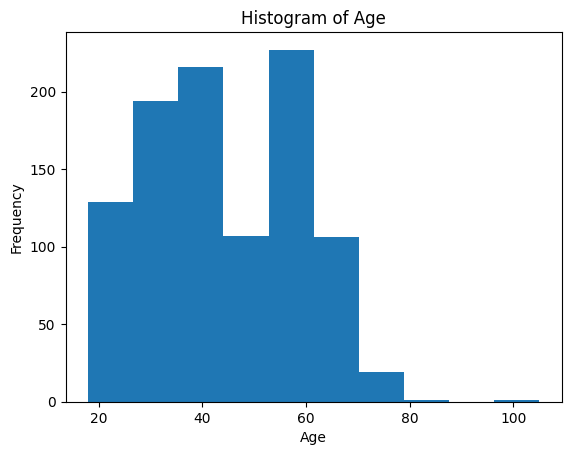

In [108]:
# Create a histogram using matplotlib
plt.hist(df['Age'], bins=10)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Display the histogram
plt.show()

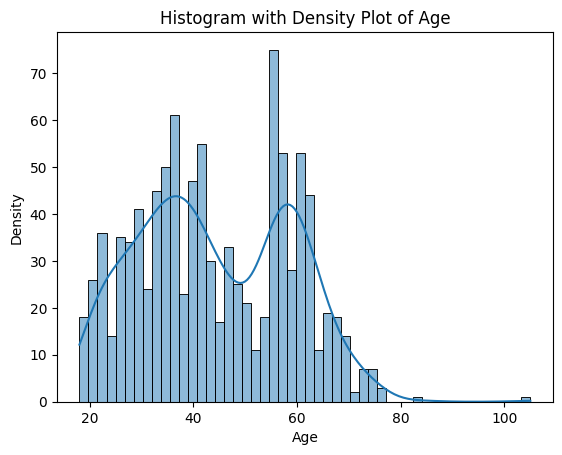

In [109]:
# Create a histogram with density plot using seaborn and matplotlib
sns.histplot(df['Age'], bins=50, kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram with Density Plot of Age')

# Display the histogram
plt.show()

In [110]:
# Calculate summary statistics using describe()
summary = df['Age'].describe()

# Print the summary statistics
print(summary)

count    1000.000000
mean       44.168000
std        14.539228
min        18.000000
25%        32.000000
50%        42.000000
75%        57.000000
max       105.000000
Name: Age, dtype: float64


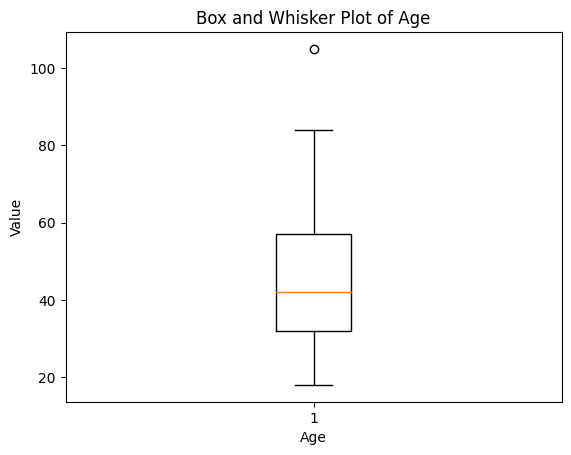

In [111]:
# Box and Whiskers plot for tourists age distribution
# Can also identify if there are any outliers

# Create a box and whisker plot using matplotlib
plt.boxplot(df['Age'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Box and Whisker Plot of Age')

# Display the plot
plt.show()

Only 1 outlier i.e. a Tourist with age 105

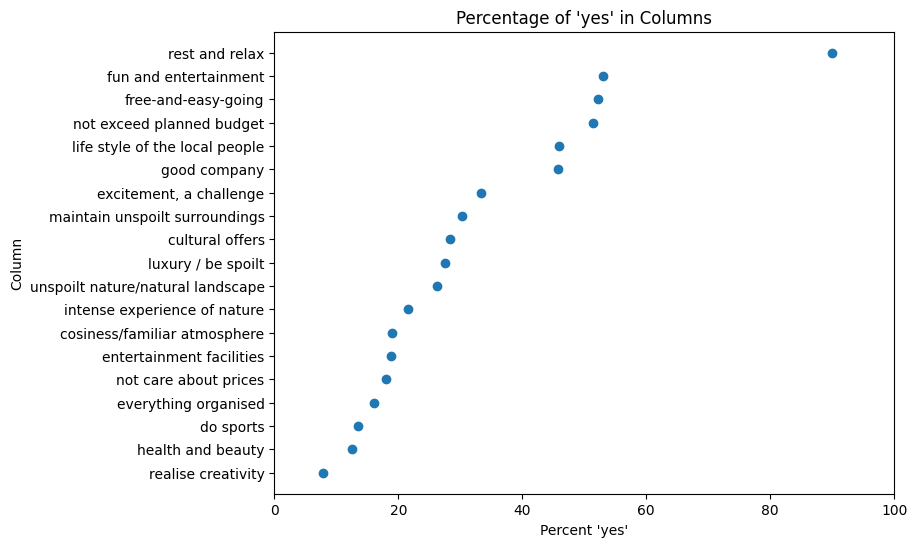

In [112]:
# Calculate the percentage of "yes" in each column
yes_percent = 100 * (df.iloc[:, 12:31] == "yes").mean()

# Sort the percentages in ascending order
sorted_yes_percent = yes_percent.sort_values()

# Create a dot chart using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(sorted_yes_percent.values, sorted_yes_percent.index)

# Add labels and limits
plt.xlabel("Percent 'yes'")
plt.ylabel("Column")
plt.title("Percentage of 'yes' in Columns")
plt.xlim(0, 100)

# Display the dot chart
plt.show()

## 6.4 Pre-Processing
### 6.4.1 Categorical Variables

In [113]:
# Calculate the frequency count of each unique value in the 'Income' column
income_counts = df['Income'].value_counts().sort_index()

# Print the sorted frequency counts
print(income_counts)


Income
$120,001 to $150,000     72
$150,001 to $180,000     32
$180,001 to $210,000     15
$210,001 to $240,000     10
$30,001 to $60,000      265
$60,001 to $90,000      233
$90,001 to $120,000     146
Less than $30,000       150
more than $240,001       11
Name: count, dtype: int64


In [114]:
# Calculate the frequency count of each unique value in the 'Income2' column
income2_counts = df['Income2'].value_counts()

# Print the frequency counts
print(income2_counts)

Income2
30-60k     265
60-90k     233
<30k       150
90-120k    146
>120k      140
Name: count, dtype: int64


In [115]:
# Create a binary matrix indicating the presence of "yes" in the columns
df_mat = (df.iloc[:, 12:31] == "yes").astype(int)

# Print the resulting binary matrix
print(df_mat)

     rest and relax  luxury / be spoilt  do sports  excitement, a challenge   
0                 1                   0          0                        0  \
1                 1                   1          0                        0   
2                 1                   0          0                        0   
3                 1                   1          0                        0   
4                 1                   0          0                        0   
..              ...                 ...        ...                      ...   
995               1                   1          0                        0   
996               1                   0          0                        0   
997               1                   0          0                        0   
998               1                   1          0                        1   
999               1                   1          1                        0   

     not exceed planned budget  realise creativity 

### 6.4.2 Numeric Variables

In [116]:
from sklearn.preprocessing import scale

# Select only the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Scale the selected numerical columns
df_scaled = pd.DataFrame(scale(df[numerical_columns]), columns=numerical_columns)

# Concatenate the scaled numerical columns with the non-numerical columns
df_scaled = pd.concat([df_scaled, df[df.columns.difference(numerical_columns)]], axis=1)

# Print the scaled DataFrame
print(df_scaled)

          Age  Education  Obligation       NEP  Vacation.Behaviour  Gender   
0   -1.319024   0.490077    1.676322 -0.799851           -1.341509  Female  \
1   -0.906141   1.316172   -0.684178 -0.443252           -1.441309  Female   
2   -1.594279  -0.749064   -0.526811 -1.037583           -2.589007    Male   
3   -1.800721  -1.162112   -1.733288 -0.443252           -1.191810  Female   
4    1.158275  -0.749064   -0.526811  0.151079           -1.854274    Male   
..        ...        ...         ...       ...                 ...     ...   
995  0.470136  -0.749064   -2.152932 -0.443252           -0.595180    Male   
996  0.951833  -0.336017    1.046855  0.388811            0.804187    Male   
997 -0.218002   1.316172    0.207567 -0.443252           -0.609644    Male   
998 -0.149188  -0.749064    0.417389 -0.918717            2.600584  Female   
999 -0.837327   0.490077   -2.205388 -0.086653           -0.352584  Female   

                   Income  Income2 Obligation2                 

### 6.5 Principal Components Analysis

In [117]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Select the categorical columns from the DataFrame
categorical_columns = df.select_dtypes(include=[object]).columns

# Encode the categorical columns with numeric labels
label_encoder = LabelEncoder()
df_encoded = df[categorical_columns].apply(label_encoder.fit_transform)

# Scale the numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Concatenate the encoded categorical columns with the scaled numerical columns
df_final = pd.concat([df_scaled, df_encoded], axis=1)

# Handle missing values using an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose an appropriate imputation strategy
df_imputed = pd.DataFrame(imputer.fit_transform(df_final), columns=df_final.columns)

# Convert column names to string type
df_imputed.columns = df_imputed.columns.astype(str)

# Apply PCA on the transformed and imputed DataFrame
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_imputed), columns=['PC{}'.format(i) for i in range(1, pca.n_components_ + 1)])

# Print the resulting PCA-transformed DataFrame
print(df_pca)


          PC1       PC2       PC3       PC4       PC5       PC6       PC7   
0   -4.397207 -2.241682  1.013030 -0.604534  2.116318  0.442466 -0.864097  \
1   -1.383916 -1.148644  5.971309  1.999261  0.325921 -0.896589  0.021240   
2    6.783218  2.610320 -0.588897  2.115808  1.110812  0.899078 -0.988966   
3    5.377388  3.206178  0.910269  2.453134  0.950544  1.717404 -1.256765   
4    1.111208 -3.959934 -0.363358  1.142166 -1.427578  0.017497  0.672896   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.404524 -2.064246  1.633360  2.217700 -0.368715  1.051639  0.526852   
996  2.540422 -3.006674  1.733261 -2.435084 -1.387022 -0.968636 -0.118373   
997 -0.384658  0.525282 -0.238118  0.138065  0.345895 -1.234469  0.214514   
998  0.440515 -3.947843 -2.797619 -1.035386 -0.858904 -0.628293 -1.488140   
999 -2.397331 -1.325805  5.723872  2.136788 -0.749960 -0.756936 -0.194368   

          PC8       PC9      PC10  ...      PC22      PC23      PC24   
0  

In [118]:
from sklearn.decomposition import PCA
import pandas as pd

# Performed on PCA  'pca' object

# Calculate the explained variance ratios manually
explained_variance_ratio = pca.explained_variance_ / sum(pca.explained_variance_)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Print the summary with two decimal places
print(summary_df.round(2))

    Principal Component  Explained Variance Ratio
0                     1                      0.30
1                     2                      0.18
2                     3                      0.15
3                     4                      0.09
4                     5                      0.05
5                     6                      0.03
6                     7                      0.03
7                     8                      0.03
8                     9                      0.02
9                    10                      0.02
10                   11                      0.01
11                   12                      0.01
12                   13                      0.01
13                   14                      0.01
14                   15                      0.01
15                   16                      0.01
16                   17                      0.01
17                   18                      0.01
18                   19                      0.01


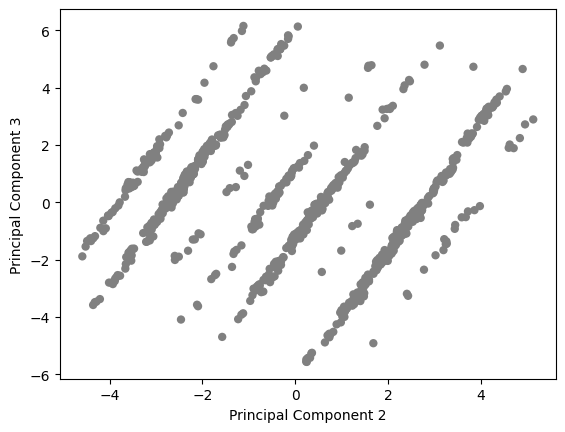

[[-1.79374488e-02  6.01856337e-02  2.85938747e-03 -2.33744845e-02
  -2.62751229e-02  1.41064705e-02 -3.88878683e-01  9.95092260e-02
  -9.12433930e-01 -1.04475868e-02  3.47083912e-03 -3.27983444e-03
   5.27006123e-03  5.95036838e-03  7.01609259e-03 -1.21891096e-02
  -3.90558108e-03  1.25577793e-02  7.48415327e-03 -6.86728995e-03
  -1.01361646e-02  1.50148696e-03  2.50691646e-03 -1.71404668e-03
  -6.40740305e-03 -2.26351342e-03 -6.67907868e-03  3.25036940e-03
  -2.74223300e-03  4.89984164e-03  5.60944681e-03]
 [-5.07649095e-02  8.32401966e-02 -2.37488568e-02 -1.24283667e-02
  -2.60602715e-02  3.62748317e-02 -8.84802439e-01  1.87698282e-01
   4.06694639e-01 -1.54019265e-02 -1.98953438e-02  7.76047227e-05
   2.32502781e-02  6.83374980e-03  7.10844288e-03 -1.32292766e-02
   4.14362859e-03  2.32839129e-02  7.88021950e-03  2.48437196e-03
   1.20817728e-04 -1.89636717e-03  2.24332196e-02  2.54530427e-02
  -1.76334664e-03 -1.02919942e-02 -1.13399200e-02 -1.25671484e-02
  -7.44976011e-03  2.4196

In [120]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming you have the DataFrame 'vacmot_final' with missing values encoded as NaN

# Impute missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_final)

# Perform PCA on the imputed data
pca = PCA()
df_pca = pca.fit_transform(df_imputed)

# Plot the data points on the 2nd and 3rd principal components
plt.scatter(df_pca[:, 1], df_pca[:, 2], marker='o', c='grey', edgecolors='none')

# Set plot labels
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

# Display the plot
plt.show()

# Projection axes for 2nd and 3rd principal components
proj_axes = pca.components_[[1, 2], :]

# Print the projection axes
print(proj_axes)
